In [76]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [77]:
#Boeing stock quote 
df = web.DataReader('ba', data_source='yahoo', start='2019-07-01', end='2020-07-07') 
#Show the data 
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-30,188.490005,180.380005,188.020004,183.300003,65493100.0,183.300003
2020-07-01,190.610001,180.039993,185.880005,180.320007,49036700.0,180.320007
2020-07-02,187.789993,180.429993,185.580002,180.809998,41792300.0,180.809998
2020-07-06,189.360001,181.600006,184.520004,187.910004,49471700.0,187.910004
2020-07-07,185.070007,178.649994,185.070007,178.880005,37105300.0,178.880005


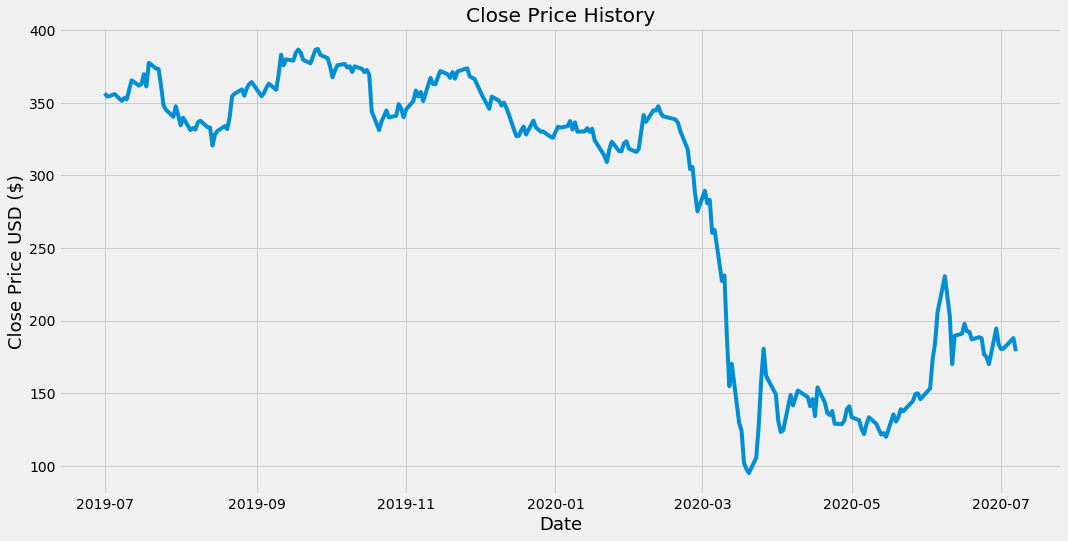

In [78]:
#Chart Closing Price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [79]:
#DF - Close
data = df.filter(['Close'])
#DF to numpy 
dataset = data.values
#Data set
training_data_len = math.ceil( len(dataset) *.8) 

In [80]:
#Scale data
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [81]:
#Training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split - x_train and y_train
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [82]:
#X_train and y_train to numpy 
x_train, y_train = np.array(x_train), np.array(y_train)


In [83]:
#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [84]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [85]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

146/146 [==============================] - 4s 29ms/step - loss: 0.0297


In [88]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#X_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [89]:
#X_test to a numpy 
x_test = np.array(x_test)

In [90]:
#Reshape the data - LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [91]:
#Predicted price 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [92]:
#Value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

24.67543835274402

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



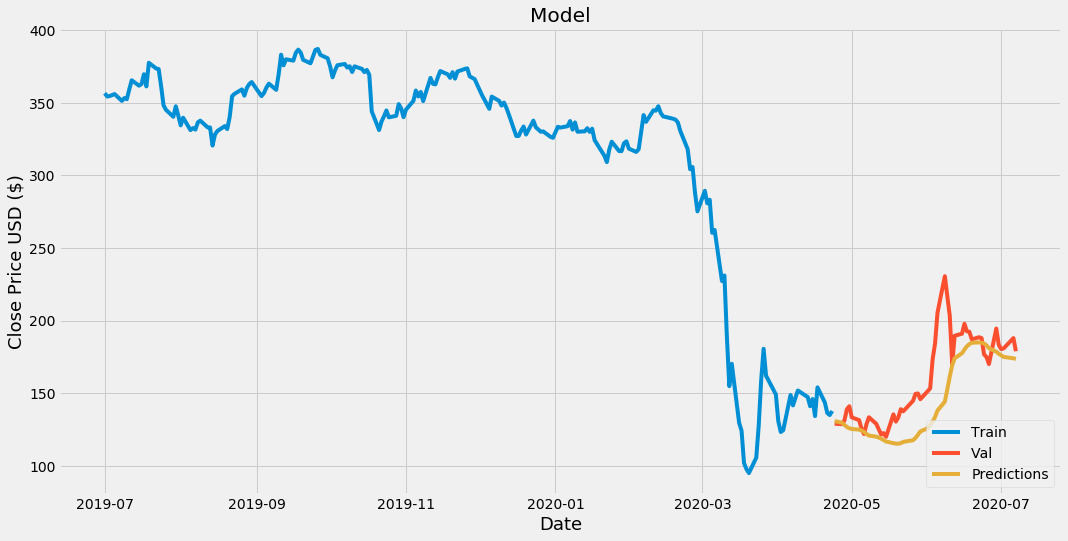

In [93]:
#Prepare data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [94]:
#Predicted prices
valid

,Close,Predictions
Date,,
2020-04-24,128.979996,130.815826
2020-04-27,128.679993,129.670517
2020-04-28,131.300003,128.210770
2020-04-29,139.000000,126.760468
2020-04-30,141.020004,125.814865
2020-05-01,133.369995,125.377632
2020-05-04,131.460007,124.898857
2020-05-05,125.400002,124.312576
2020-05-06,121.860001,123.355217


In [95]:
#Boeing quote
ba_quote = web.DataReader('BA', data_source='yahoo', start='2019-07-07', end='2020-07-07')
#New df
new_df = ba_quote.filter(['Close'])
#60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data 
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append 60 days
X_test.append(last_60_days_scaled)
#X_test data set to a numpy 
X_test = np.array(X_test)
#Reshape 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Predicted price
pred_price = model.predict(X_test)
#Remove the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[173.0298]]


In [96]:
#Boeing quote
ba_quote2 = web.DataReader('ba', data_source='yahoo', start='2020-07-08', end='2020-07-08')
print(ba_quote2['Close'])

Date
2020-07-08    180.080002
Name: Close, dtype: float64
